<a href="https://colab.research.google.com/github/kevinrchilders/stochastics/blob/main/stochastics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stochastics

From a special topics course at the University of Utah in Spring 2020.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
---

## Markov chains

---

### Ranking websites

Consider a tiny web consisting of 6 sites. Site 1 is John’s
homepage. John teaches calculus and his site points to sites 2 and 3. Site 2 is the course syllabus and does not point to any other sites. Site 3 is the calculus course website. It points back at John’s homepage and also at the course syllabus. It also points at Emily’s webpage, site 5. (Emily is the TA for the course.) Site 4 belongs to a friend of Emily’s, Jack. It points at Emily’s website and at Jack’s old website, site 6. Emily’s website points at both Jack’s pages, the new one 4 and the old one 6. Jack’s old webpage 6 points at his new webpage 4.

Suppose from any site you are equally likely to follow any link.  This creates a Markov process, since your decision of what to click next depends only on your current location.  There's one issue: site 2 doesn't have any links.  So let's just say that from site 2 you are equally likely to jump to any of the six sites.  Then the transition matrix $\Pi$ is given by:

In [2]:
Pi = np.array([[0, 1/6, 1/3, 0, 0, 0], 
                [1/2, 1/6, 1/3, 0, 0, 0], 
                [1/2, 1/6, 0, 0, 0, 0], 
                [0, 1/6, 0, 0, 1/2, 1], 
                [0, 1/6, 1/3, 1/2, 0, 0], 
                [0, 1/6, 0, 1/2, 1/2, 0]])

print(Pi)

[[0.         0.16666667 0.33333333 0.         0.         0.        ]
 [0.5        0.16666667 0.33333333 0.         0.         0.        ]
 [0.5        0.16666667 0.         0.         0.         0.        ]
 [0.         0.16666667 0.         0.         0.5        1.        ]
 [0.         0.16666667 0.33333333 0.5        0.         0.        ]
 [0.         0.16666667 0.         0.5        0.5        0.        ]]


Suppose that we wish to "rank" the sites.
We could do this by computing the invariant measure (which tells us the probability to be at each site after a large number of clicks).
Notice that $\Pi$ has an eigenvalue of 1.

In [3]:
np.linalg.eigvals(Pi)[0]

(1.0000000000000013+0j)

We can find the invariant measure by solving for an eigenvector of $\Pi$ with eigenvalue 1, and normalizing so that the entries add to 1.

In [4]:
evec = np.linalg.eig(Pi)[1][:, 0]

# Shows that evec is an eigenvector for 1

print('Pi*evec =\t', np.round(np.dot(Pi, evec),5))
print('evec =\t\t', np.round(evec,5))

Pi*evec =	 [0.     +0.j 0.     +0.j 0.     +0.j 0.74278+0.j 0.37139+0.j 0.55709+0.j]
evec =		 [0.     +0.j 0.     +0.j 0.     +0.j 0.74278+0.j 0.37139+0.j 0.55709+0.j]


In [5]:
# Drop imaginary parts (which appear to be 0)
evec = np.real(evec)
print('Before normalizing:\t',np.round(evec,5))

# Scale so that the entries sum to 1
evec = evec / np.sum(evec)
print('After normalizing:\t',np.round(evec,5))

Before normalizing:	 [0.      0.      0.      0.74278 0.37139 0.55709]
After normalizing:	 [0.      0.      0.      0.44444 0.22222 0.33333]


So the invariant measure is given by $[0, 0, 0, \frac49, \frac29, \frac39]^T$.  Notice that in this model sites 1, 2, and 3 are transient.  So it isn't surprising that the invariant measure gives zero probability to these states.
As a result, we can't fully rank the sites.

To fix this, we can add to each site (other than 2) a small chance of jumping to any site.
Say that with 15% probability we make a random jump, and with 85% probability we follow a link.

Then new transition matrix is given by:

In [6]:
Pi = Pi * 0.85 + (0.15 / 6)

print(Pi)

[[0.025      0.16666667 0.30833333 0.025      0.025      0.025     ]
 [0.45       0.16666667 0.30833333 0.025      0.025      0.025     ]
 [0.45       0.16666667 0.025      0.025      0.025      0.025     ]
 [0.025      0.16666667 0.025      0.025      0.45       0.875     ]
 [0.025      0.16666667 0.30833333 0.45       0.025      0.025     ]
 [0.025      0.16666667 0.025      0.45       0.45       0.025     ]]


Now every site has a positive probability of leading to any other site, so there all states are recurrent.
We can calculate the invariant measure as before:

In [7]:
evec = np.real(np.linalg.eig(Pi)[1][:,0])
evec = evec / np.sum(evec)

print('Invariant measure: ', np.round(evec,3))

Invariant measure:  [0.052 0.074 0.057 0.349 0.2   0.269]


We can now rank the sites (most important first) as:

4, 6, 5, 2, 3, 1

---

### Probability of absorption

Suppose that a process has transition operator $\Pi$ given by

In [8]:
Pi = np.array([[1, 0, 0, 0, 0],
               [1/2, 0, 1/2, 0, 0],
               [0, 1/2, 0, 1/2, 0],
               [0, 0, 1/2, 0, 1/2],
               [0, 0, 0, 0, 1]])
print(Pi)

[[1.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  1. ]]


Call the states 0, 1, 2, 3, and 4.
Then states 0 and 4 are absorbing, while states 1, 2, and 3 are transient.

Notice that I have written $\Pi$ as the transpose of the form that I used for ranking websites.  Both forms are common.

Suppose we start at state 1.
Eventually we will be absorbed in either states 0, or 4.
What is the probability of each?

We could estimate by applying $\Pi$ many times to the vector $[0, 1, 0, 0, 0]^T$.

In [9]:
vec = np.array([0,1,0,0,0])

for i in range(100):
  vec = np.dot(vec, Pi)

print(np.round(vec,3))

[0.75 0.   0.   0.   0.25]


So we expect to be absorbed in state 0 with probability 0.75 and to be absorbed in state 4 with probability 0.25.

Lets try to solve this mathematically. 
We'll start by permuting the states to write the matrix in the form
$$ \left[\begin{array}{c|c} I & 0 \\ \hline S & Q \end{array}\right] $$
where the absorbing states are listed first, and then the transient states.
So if we list the states in the order 0, 4, 1, 2, 3, then the transition matrix becomes:

In [10]:
Pi = np.array([[1, 0, 0, 0, 0],
               [0, 1, 0, 0, 0],
               [1/2, 0, 0, 1/2, 0],
               [0, 0, 1/2, 0, 1/2],
               [0, 1/2, 0, 1/2, 0]])
print(Pi)

[[1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.5 0.  0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.  0.5 0.  0.5 0. ]]


And we have

In [11]:
S = Pi[2:, :2]
Q = Pi[2:, 2:]

print('S=', S)
print('Q=', Q)

S= [[0.5 0. ]
 [0.  0. ]
 [0.  0.5]]
Q= [[0.  0.5 0. ]
 [0.5 0.  0.5]
 [0.  0.5 0. ]]


Now suppose that $x, y$ are two transient states, and we begin at $x$.
The probability of being at $y$ after 1 step is given by $Q_{x,y}$.
Similarly, the probability of being at $y$ after $n$ steps is given by $Q^n_{x,y}$.
So the expected number of visits to $y$ is given by the $(x,y)$-entry of
$$ \sum_{n=0}^\infty Q^n. $$
After checking some convergence and invertibility, we can use our series intuition to compute
$$ \sum_{n=0}^\infty Q^n = (I - Q)^n. $$
We can use this to compute the average number of steps to get absorbed, etc.

Another application of this matrix is to compute the probability of absorption for different states.
Let $x$ denote a transient state (starting point) and $r$ a recurrent state (ending point).
We wish to calculate $a(x,r) = P_x(\tau_r<\infty)$, in other words, the probability of starting at state $x$ and being absorbed by state $r$.

By "taking a step," we have
$$ a(x,r) = \sum_y p(x,y)a(y,r), $$
where the sum is over all states, and $p(x,y)$ is the $(x,y)$-entry of the transition matrix (the probability of jumping from state $x$ to state $y$).
If $y$ is absorbing, then
$$ a(y,r) = \begin{cases} 1 & y = r \\ 0 & y \neq r \end{cases} $$.
So we have
$$ a(x,r) = \sum_{y\text{ trans}}p(x,y)a(y,r) + p(x,r). $$ 
Thus, if $A = (a(x,r))$, then $A = Q A + S$, or $A = (I-Q)^{-1}S$.

In [12]:
A = np.dot(np.linalg.inv(np.identity(3)-Q), S)

print(A)

[[0.75 0.25]
 [0.5  0.5 ]
 [0.25 0.75]]


We can now read off of the first row (corresponding to starting at state 1) that there is a probability of 0.75 of being absorbed by state 0 and a probability of 0.25 of being absorbed by state 4.
This matches our earlier estimation!

If we want to know the average number of steps it takes to be absorbed, we can just add up the average number of visits to each transient state using the matrix $(I - Q)^{-1}$ again.

In [13]:
print(np.sum(np.linalg.inv(np.identity(3)-Q), axis=1))

[3. 4. 3.]


The first entry is telling us that it takes an average of 3 steps to be absorbed.
Here's some code to test this empirically:

In [14]:
def trial():
  state = 1
  steps = 0
  absorbed = False
  while absorbed == False:
    steps = steps + 1
    if state == 1:
      if np.random.rand() > 0.5:
        state = 0
        absorbed = True
      else:
        state = 2
    elif state == 2:
      if np.random.rand() > 0.5:
        state = 1
      else:
        state = 3
    else:
      if np.random.rand() > 0.5:
        state = 2
      else:
        state = 4
        absorbed = True
  return [state, steps]

In [15]:
def sample(num_trials=10000):
  states = np.zeros(5)
  steps = []
  for _ in range(num_trials):
    state, stps = trial()
    states[state] += 1
    steps.append(stps)
  print('Out of ', num_trials, ' trials:')
  print('Finishing states: ', states)
  print('Average number of steps :', sum(steps)/num_trials)

In [16]:
sample()

Out of  10000  trials:
Finishing states:  [7449.    0.    0.    0. 2551.]
Average number of steps : 3.0038


---

### Snakes and ladders

Consider a nine square game of snakes and ladders, with the squares numbered from 1 to 9.
You begin at square 1, and the game ends when you reach square 9.
There's ladders going from square 2 to square 7, and from square 3 to square 5.
There's snakes going from square 6 to square 1, and from square 8 to square 4.
On your turn, you flip a fair coin.
If the coin is heads you move forward one step, and if tails you move forward 2 steps.

Suppose we are playing by ourselves.
How many turns do we expect a game to last?

The state space consists of squares 1, 4, 5, 7, and 9.
The transition matrix for this process is given by:

In [17]:
Pi = np.array([[0, 0, 1/2, 1/2, 0],
               [1/2, 0, 1/2, 0, 0],
               [1/2, 0, 0, 1/2, 0],
               [0, 1/2, 0, 0, 1/2],
               [0, 0, 0, 0, 1]])

print(Pi)

[[0.  0.  0.5 0.5 0. ]
 [0.5 0.  0.5 0.  0. ]
 [0.5 0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.  1. ]]


The matrix $Q$ is given by

In [18]:
Q = Pi[:4, :4]

print(Q)

[[0.  0.  0.5 0.5]
 [0.5 0.  0.5 0. ]
 [0.5 0.  0.  0.5]
 [0.  0.5 0.  0. ]]


In [19]:
# Calculate (I-Q)^-1, and sum along the rows.

print(np.sum(np.linalg.inv(np.identity(4) - Q),axis=1))

[7. 8. 7. 5.]


We conclude from the frist entry that we expect a game to last 7 turns on average.

Now suppose you want to convince your friend to play your game with you, but she thinks 7 turns is just too long.
Let's try to figure out how long we expect a game to last with 2 players.

Since the two players moves are independent, we might as well think of the players as moving at the same time.
So the new state space consists of tuples $(a,b)$ with $a,b \in \{1, 4, 5, 7, 9\}$ and the game ends when one of $a$ or $b$ is 9.

The transition matrix is much bigger.
We can compute it by using a matrix tensor product of $\Pi$ with itself.


In [20]:
Pi = np.tensordot(Pi, Pi, axes=0)
Pi = np.array([[Pi[i//5, j//5, i%5, j%5] for j in range(25)] for i in range(25)])
print(Pi)

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.25
  0.   0.   0.   0.25 0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.25 0.
  0.   0.25 0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.25
  0.   0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.
  0.25 0.   0.25 0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.5  0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.25
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.25 0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.25
  0.   0.   0.   0.   0.  

Technically we should make any state with $a$ or $b$ equal to 5 to be absorbing.
Once we delete these rows and colums we get the matrix $Q$.

In [21]:
Q = Pi
Q = np.delete(Q, [4, 9, 14, 19, 20, 21, 22, 23, 24], 0)
Q = np.delete(Q, [4, 9, 14, 19, 20, 21, 22, 23, 24], 1)

# Calculate (I-Q)^-1
print(np.sum(np.linalg.inv(np.identity(16) - Q),axis=1))

[4.04201681 4.48739496 4.04201681 2.93277311 4.48739496 5.04201681
 4.48739496 3.24369748 4.04201681 4.48739496 4.04201681 2.93277311
 2.93277311 3.24369748 2.93277311 2.2605042 ]


The first entry tells us that we expect the game to only take about 4 turns on average with 2 players.

Your friend agrees to play.
You go first and end up winning!
Your friend says that the game wasn't fair because you got to go first.
We can figure out the probability of winning given that we went first as follows.

We can combine all the states $(a,b)$ with $a=5$ into one state where the first player wins.
We can combing all the states with $a\neq 5$ and $b=5$ into a second state where the second player wins.
Then, we calculate the probabilities of getting absorbed into these two states.

We have already computed the matrix $(I-Q)^{-1}$.
We just need the matrix $S$.

In [22]:
S = np.zeros((16,2))

# Chances of player one winning
S[12, 0] = S[13, 0] = S[14, 0] = S[15, 0] = 0.5

# Chances of player two winning
S[3,1] = S[7,1] = S[11,1] = 0.5
S[15,1] = 0.25

print(S)

[[0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.5 ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.5 ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.5 ]
 [0.5  0.  ]
 [0.5  0.  ]
 [0.5  0.  ]
 [0.5  0.25]]


In [23]:
print(np.dot(np.linalg.inv(np.identity(16) - Q), S))

[[0.55462185 0.44537815]
 [0.62184874 0.37815126]
 [0.55462185 0.44537815]
 [0.33613445 0.66386555]
 [0.44537815 0.55462185]
 [0.55462185 0.44537815]
 [0.44537815 0.55462185]
 [0.31092437 0.68907563]
 [0.55462185 0.44537815]
 [0.62184874 0.37815126]
 [0.55462185 0.44537815]
 [0.33613445 0.66386555]
 [0.68907563 0.31092437]
 [0.72268908 0.27731092]
 [0.68907563 0.31092437]
 [0.63865546 0.36134454]]


The first rows tells us that player 1 has a 55% chance of winning while player 2 only has a 45% chance of winning.
I guess your friend was right this time...

---
---

## Brownian Motion

---

### Generating Brownian motion

First, we will write a function to generate 1-dimensional Brownian motion on an interval $[0, T]$.
Possible inputs are $T$, $N$, $\sigma$, and $\mu$.
$N$ is a resolution parameter, so that we take $N$ steps per unit interval, and approximate $B(k/N) = (X_1 + \cdots + X_k - k\mu)/(\sigma\sqrt N)$ for $k \in \{1, \ldots, \lfloor TN \rfloor\}$, where $X_i$ are iid with normal distribution with mean $\mu$ and standard deviation $\sigma$.

In [24]:
# Approximates Brownian motion on [0, T] with N steps per unit interval.
# Returns time steps and a sample of brownian motion at these time steps.

def brownian(T=1, N=1000, mu=0, sigma=1):
  length = int(N * T)
  X = np.random.randn(length) * sigma + mu
  B = np.concatenate(([0], np.cumsum(X - mu) / sigma / np.sqrt(N)))
  return np.arange(length+1) / N, B

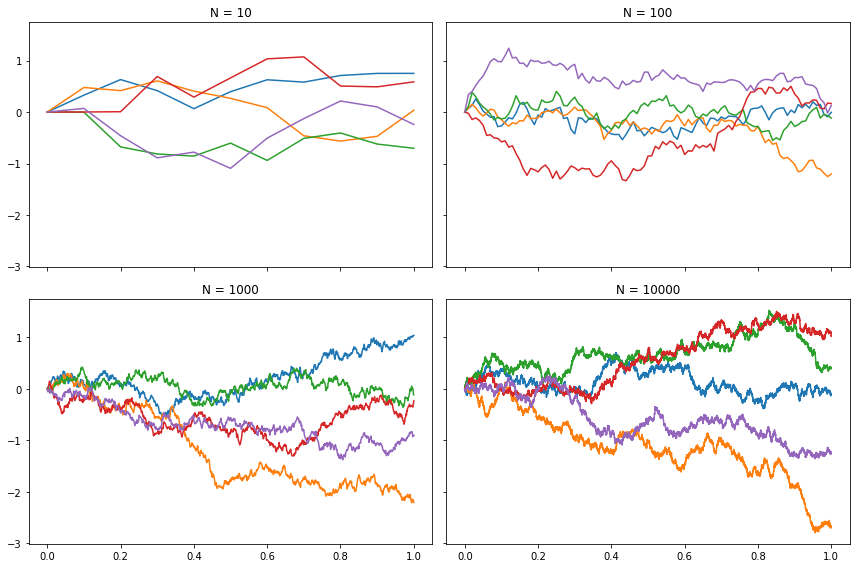

In [25]:
# Plots some examples of Brownian motion, varying the resolution parameter N

fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(12,8))

axes[0, 0].set_title('N = 10')
for i in range(5):
  t, B = brownian(N=10)
  axes[0, 0].plot(t, B)

axes[0, 1].set_title('N = 100')
for i in range(5):
  t, B = brownian(N=100)
  axes[0, 1].plot(t, B)

axes[1, 0].set_title('N = 1000')
for i in range(5):
  t, B = brownian()
  axes[1, 0].plot(t, B)

axes[1, 1].set_title('N = 10000')
for i in range(5):
  t, B = brownian(N=10000)
  axes[1, 1].plot(t, B)

plt.tight_layout()

To generate n-dimensional Brownian motion, one can simply generate $n$ independent 1-dimensional Brownian motions, one for each coordinate.

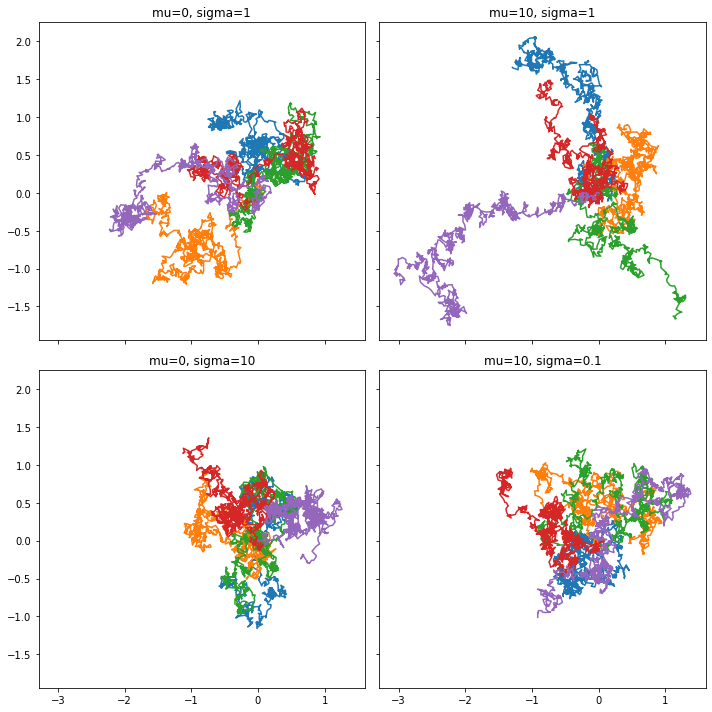

In [26]:
# Generates some 2-dimensional samples of Brownian motion.
# Shows the effect of varying sigma and mu

fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))

axes[0, 0].set_title('mu=0, sigma=1')
for i in range(5):
  _, Bx = brownian()
  _, By = brownian()
  axes[0,0].plot(Bx, By)

axes[0, 1].set_title('mu=10, sigma=1')
for i in range(5):
  _, Bx = brownian(mu=10)
  _, By = brownian(mu=10)
  axes[0,1].plot(Bx, By)

axes[1, 0].set_title('mu=0, sigma=10')
for i in range(5):
  _, Bx = brownian(sigma=10)
  _, By = brownian(sigma=10)
  axes[1,0].plot(Bx, By)

axes[1, 1].set_title('mu=10, sigma=0.1')
for i in range(5):
  _, Bx = brownian(mu=10, sigma=0.1)
  _, By = brownian(mu=10, sigma=0.1)
  axes[1,1].plot(Bx, By)

plt.tight_layout()

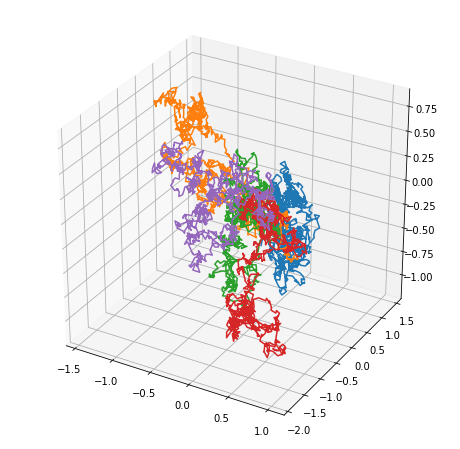

In [27]:
# Some 3D examples

plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in range(5):
  _, Bx = brownian()
  _, By = brownian()
  _, Bz = brownian()
  ax.plot3D(Bx, By, Bz)

---

### Numerical reality checks

First, we will try to estimate the expected value of $\max_{0\leq t \leq 1} B_t$.

In reality, the reflection principle tells us that
$$
\begin{array}{ll}
E[\max_{0\leq t \leq 1} B_t] & =E[|Z|] \\
& =\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty|z|e^{-z^2/2}\,dz \\
& =\sqrt{2/\pi} \approx 0.79788.
\end{array}
$$

In [28]:
maxes = []
for _ in range(10000):
  t, B = brownian(N=10000)
  maxes.append(np.max(B))

print('Average maximum value over 10,000 samples: ', np.average(maxes))

Average maximum value over 10,000 samples:  0.7968907142314717


Next, we will try to estimate the expected value of $\int_0^2B_t\,dt$, which should be zero by the symmetry of Brownian motion.

In [29]:
integrals = []
for _ in range(10000):
  t, B = brownian(T=2)
  integral = (B[0] + B[-1] + np.sum(2 * B[1:-1])) / 4000 # Trapaziod rule
  integrals.append(integral)

print('Average integral over 10,000 samples: ', np.average(integrals))

Average integral over 10,000 samples:  0.0018825568061208746


Finally, we will approximate the expected value of $\lambda(\{t \in [0, 4] \mid B_t>0\})$, which we expect to be $2 = \frac12\lambda([0,4])$.
*(Here, $\lambda$ dentoes the Lebesgue meaure on $\mathbb R$.)*

In [30]:
measures = []
for _ in range(10000):
  t, B = brownian(T=4)
  measure = B[B>0].size / 1000
  measures.append(measure)

print('Average measure over 10,000 samples: ', np.average(measures))

Average measure over 10,000 samples:  1.9890937999999998


---

### Applications to differential equations

Suppose that $u(x,y)$ represents the heat on the unit square $[0,1]^2$, and that $\Delta u = 0$ (so there is no change in heat over time).
Suppose $u(x,y)$ satisfies boundary conditions $u(0,y) = 0$, $u(1,y) = 1$ (for $0 < y < 1$) and $u(x,0) = 1$, $u(x,1) = 2$ (for $0 < x < 1$).
 Call this boundary function $g(x,y)$.

 Then we can solve for $u(x,y)$ using Brownian motion as
 $$ u(x,y) = E_{(x,y)}[g(B_\tau)], $$
 where $\tau$ is the stopping time to hit the boundary for a 2-dimensional Brownian motion starting at $(x,y)$.

In [31]:
# Numerically estimates u(x,y) by averaging M samples of Brownian motion.

def u(x,y, M=1000, N=1000):
  samples = []
  for i in range(M):
    Bx = brownian(T=2, N=N)[1] + x                                                    # Generate a x-directional Brownian motion starting at x
    By = brownian(T=2, N=N)[1] + y                                                    # Generate a y-directional Brownian motion starting at y
    j = np.min([np.argmax(np.abs(Bx-0.5) >= 0.5), np.argmax(np.abs(By-0.5) >= 0.5)])  # Find the stopping time to hit the boundary

    # Sample the correct boundary condition
    if Bx[j] <= 0:
      samples.append(0)
    elif Bx[j] >= 1 or By[j] <= 0:
      samples.append(1)
    else:
      samples.append(2)

  return np.average(samples)  # Average the samples

In [32]:
u(0.5, 0.5), u(0.01, 0.5), u(0.5, 0.99)

(1.002, 0.09, 1.929)

In [33]:
def plot_heat(M=1000, prec=1000, N=1000):
  X, Y = np.meshgrid(np.linspace(0, 1, prec+1), np.linspace(0, 1, prec+1))
  Z = [[u(x, y, M=M, N=N) for x in np.linspace(0, 1, prec+1)] for y in np.linspace(0, 1, prec+1)]
  fig = plt.figure(figsize=(8,8))
  ax = plt.axes(projection='3d')
  ax.contour3D(X, Y, Z, 75, cmap='coolwarm')
  return fig, ax

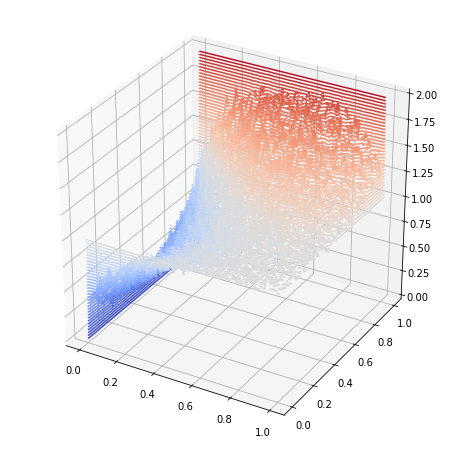

In [34]:
fig, ax = plot_heat(M=100, N=100, prec=100)

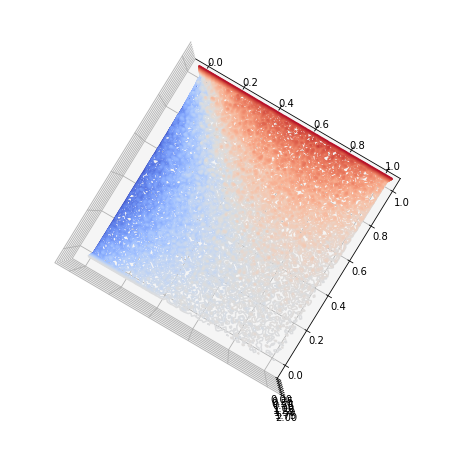

In [35]:
ax.view_init(90)
fig

---
---

## Stochastic differential equations

---

### Integrating Brownian motion

It turns out that $\int_0^t B_s\,dB_s \neq \frac12 B_t^2$.

Letting $Y_t = \frac12 B_t^2$, Ito's formula implies that $Y_t$ satisfies the SDE
$$ dY_t = \frac12dt + B_t\,dB_t. $$
Since $Y_t = 0$, this means
$$ Y_t = \int_0^t\frac12\,ds + \int_0^tB_s\,dB_s. $$
Thus,
$$ \int_0^tB_s\,dB_s = \frac12(B_t^2 - t). $$
We will see that we can approximate this solution numerically using a left endpoint "Riemann sum," but that a midpoint or right endpoint Riemann sum will give unwanted drift.

In [36]:
# Integrate B_t from 0 to 1 with respect to B_t

_, B = brownian()                                               # Get a sample of Brownian motion

numerical_approx = ((B**2)[-1] - 1) / 2                         # Use the solution obtained above by Ito's formula
LP = np.sum(((np.roll(B, -1) - B)[:-1]) * B[:-1])               # Left endpoint approximation
RP = np.sum(((np.roll(B, -1) - B)[:-1]) * B[1:])                # Right endpoint approximation
MP = np.sum(((np.roll(B, -1) - B)[:-1]) * ((B[1:]+B[:-1]) / 2)) # Midpoint approximation

print('Numerical approximation:\t', numerical_approx)
print('Left endpoint approximation:\t', LP)
print('Midpoint approximation:\t\t', MP)
print('Right endpoint approximation:\t', RP)

Numerical approximation:	 0.4601389272889983
Left endpoint approximation:	 0.46229276015240317
Midpoint approximation:		 0.9601389272889984
Right endpoint approximation:	 1.4579850944255939


In [37]:
print('With drift compensation')
print('NA:\t\t', numerical_approx)
print('LP:\t\t', LP)
print('MP - 0.5:\t', MP-0.5)
print('RP - 1:\t\t', RP-1)

With drift compensation
NA:		 0.4601389272889983
LP:		 0.46229276015240317
MP - 0.5:	 0.4601389272889984
RP - 1:		 0.4579850944255939


---

### Geometric Brownian Motion